Death Prediction in India using Linear Regression

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px


In [10]:
df=pd.read_csv("F:\\covid project\\india.csv")

In [11]:
df.head(5)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,eve_cases,death
0,IND,India,12/31/2019,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0
1,IND,India,1/1/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0
2,IND,India,1/2/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0
3,IND,India,1/3/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0
4,IND,India,1/4/2020,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0


In [12]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,eve_cases,death
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,4.300000e+01,37.000000,43.000000,37.000000,127.000000,127.000000
mean,5299.740157,388.905512,169.637795,13.338583,3.840315,0.281819,0.122921,0.009669,3.681270e+05,30861.972973,0.266791,0.022351,5390.322835,171.874016
std,11098.460330,735.908190,363.304732,28.107283,8.042337,0.533277,0.263294,0.020345,3.750261e+05,25191.248103,0.271745,0.018220,11221.841194,365.697876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,0.005000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,5.859800e+04,11534.000000,0.042500,0.008000,1.000000,0.000000
50%,5.000000,1.000000,0.000000,0.000000,0.004000,0.001000,0.000000,0.000000,2.175540e+05,27339.000000,0.158000,0.020000,6.000000,0.000000
75%,3138.000000,506.000000,72.500000,10.500000,2.274000,0.366500,0.052500,0.008000,6.026330e+05,45352.000000,0.436500,0.033000,3324.500000,79.000000
max,49391.000000,3900.000000,1694.000000,195.000000,35.790000,2.826000,1.228000,0.141000,1.276781e+06,84835.000000,0.925000,0.061000,49391.000000,1694.000000


In [13]:
df.isnull().sum()

iso_code                     0
location                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   0
total_cases_per_million      0
new_cases_per_million        0
total_deaths_per_million     0
new_deaths_per_million       0
total_tests                 84
new_tests                   90
total_tests_per_thousand    84
new_tests_per_thousand      90
tests_units                 84
eve_cases                    0
death                        0
dtype: int64

In [33]:
index = df.index
n = len(index)
ac= df.iloc[n-1,16]
rvd =df.iloc[n-1,17]
fig = go.Figure(data=[go.Pie(labels=['Confirmed cases','Death'],
                             values= [ac,rvd],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Current Situation in India  \n Number of patients death and confirmed cases for covid-19 in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()


In [16]:

fig = px.bar(df, x = 'date', y = 'new_cases', title='Number of persons confirmed cases per day for covid19 in India')
fig.show()


In [34]:
fig = px.bar(df, x = 'date', y = 'new_deaths', title='Number of persons death per day for covid19 in India')
fig.show()


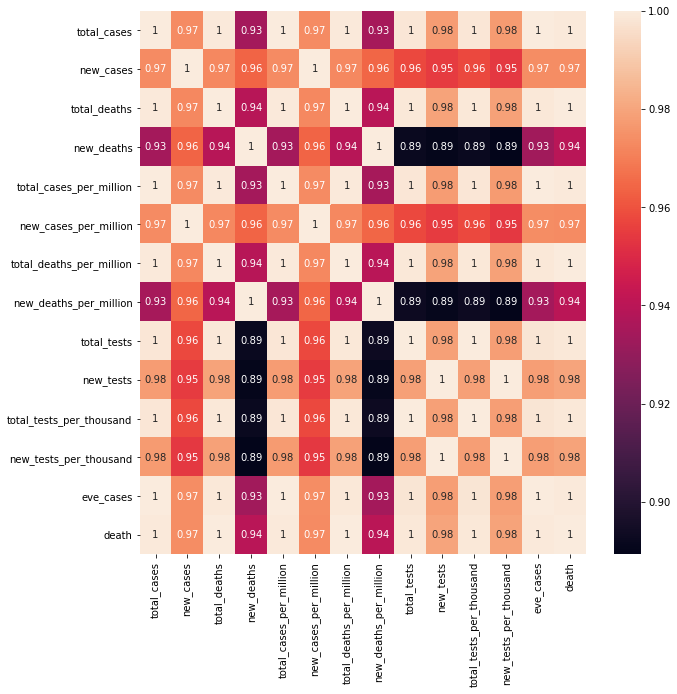

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,2:18].corr(),annot=True)

In [20]:
x=df.iloc[:,3:4]
y=df.iloc[:,5]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)


In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
lr=LinearRegression()


In [24]:
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred=lr.predict(x_test)


In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
accuracy=r2_score(y_pred,y_test)*100
print("Accuracy r2_score",accuracy)


Accuracy r2_score 99.78890047869278


In [29]:
print("ACCURACY=",lr.score(x_train,y_train)*100)

ACCURACY= 99.90082278118953


In [30]:
from sklearn.metrics import mean_absolute_error
pred= lr.predict(x_test)
print("MAE=",mean_absolute_error(y_test, pred))


MAE= 6.9537812332529505


In [31]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("MSE=",mse)


MSE= 234.6652267760157


In [32]:
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))


Final rmse value is = 15.318786726631313
